epoch1,loss0.482140
epoch2,loss0.054388
epoch3,loss0.026882
w的估计误差：tensor([ 0.3276, -4.3658], grad_fn=<SubBackward0>)
b的估计误差：tensor([2.5477], grad_fn=<RsubBackward1>)


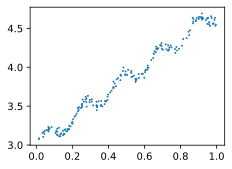

In [21]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

import numpy as np

# 读取数据文件
data = np.loadtxt('baoyu.txt', dtype=np.float32)

# 将数据转换为PyTorch张量
features = torch.from_numpy(data[:, 0:2])
labels = torch.from_numpy(data[:, 2])

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)   

def data_iter(batch_size,features,labels):
    num_examples = len(features)  # 样本个数
    indices = list(range(num_examples)) # 样本索引
    # 这些样本是随即读取的，没有特定的顺序
    random.shuffle(indices) # 把索引随即打乱
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)]) # 当i+batch_size超出时，取num_examples         
        yield features[batch_indices], labels[batch_indices] # 获得随即顺序的特征，及对应的标签
        
batch_size = 10

# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

# 定义模型
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

# 定义损失函数
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2 # 将y统一成与y_hat一样同尺寸   

# 定义优化算法
def sgd(params,lr,batch_size):
    """小批量随即梯度下降"""
    with torch.no_grad(): # 不要产生梯度计算，减少内存消耗
        for param in params: # 每个参数进行遍历
            param -= lr * param.grad / batch_size # 每个参数进行更新，损失函数没有求均值，所以这里除以 batch_size 求了均值。                    
            param.grad.zero_() # 每个参数的梯度清零

# 训练过程
lr = 0.03
num_epochs = 3
net = linreg # 这里用线性模型，这样写是很方便net赋予其他模型，只需要改一处，不需要下面所有网络模型名称都改
loss = squared_loss

# 训练过程
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # x和y的小批量损失
        # 因为l是形状是(batch_size,1)，而不是一个标量。l中所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b],lr,batch_size) #使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')   

# 比较真实参数和通过训练学到的参数来评估训练的成功程度
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')